In [1]:
from PIL import Image
import numpy as np

In [2]:
!ls images

2a9a0827.jpg 302a5b93.jpg bd8b282b.jpg ea5f45ca.jpg f1b24b92.jpg faab2561.jpg


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
im = Image.open("images/faab2561.jpg").convert('L')

In [5]:
np.array(im).shape

(1575, 1050)

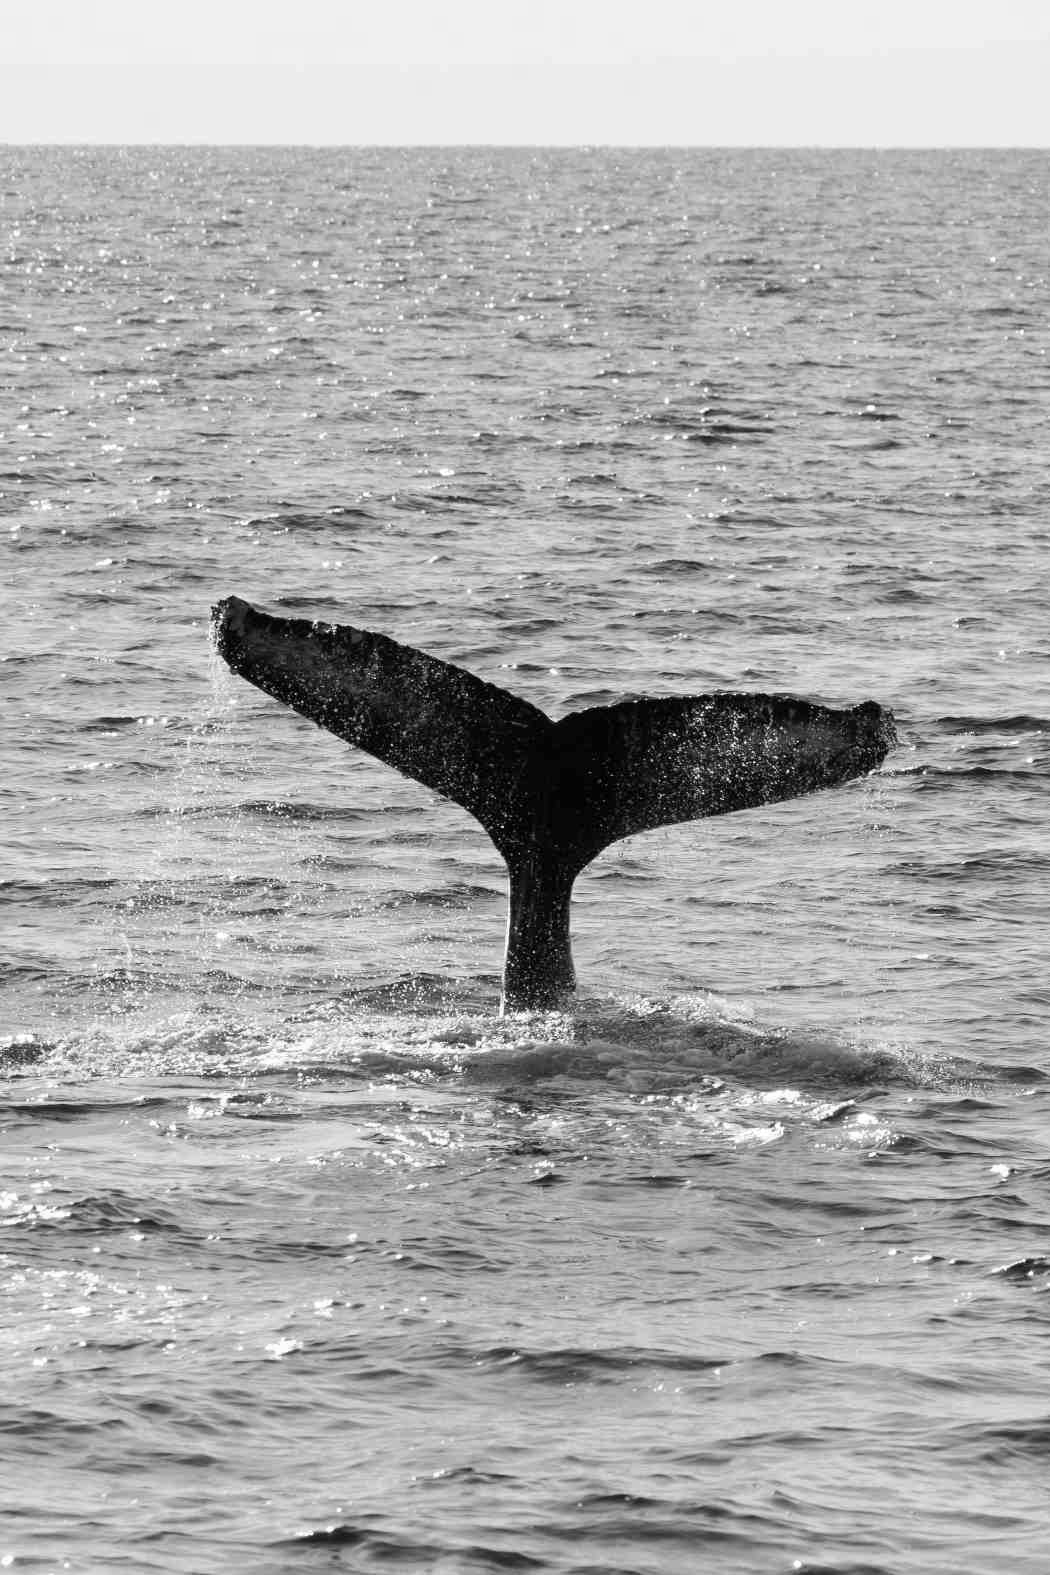

In [6]:
im

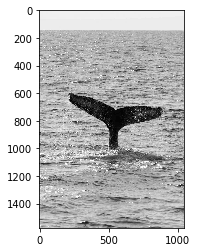

In [7]:
plt.imshow(np.array(im), cmap='gray')

### Thresholding

In [8]:
def binary_mean_threshold(image):
    binary_mean = im > np.mean(im)
    return binary_mean

In [9]:
def binary_median_threshold(image):
    binary_median = im > np.median(im)
    return binary_median

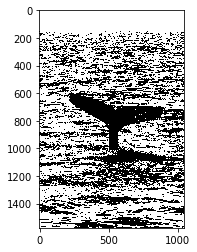

In [10]:
plt.imshow(binary_mean_threshold(im), cmap='gray')

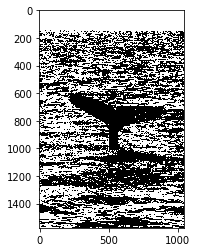

In [11]:
plt.imshow(binary_median_threshold(im), cmap='gray')

(array([  48168.,   27477.,   31609.,   50727.,   81883.,  159351.,
         430114.,  511610.,  142442.,  170369.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

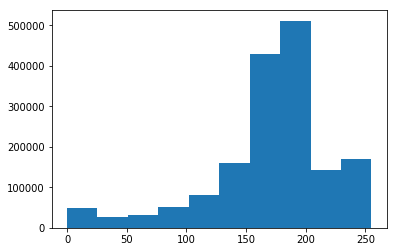

In [12]:
plt.hist(np.array(im).flatten())

### Image Smoothening

In [13]:
def convolve(image, filt3_3):
    n, m = image.shape
    smooth_image = np.copy(image)
    for i in range(1, n - 1):
        for j in range(1, m - 1):
            smooth_image[i][j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * filt3_3)
            
    return smooth_image

In [14]:
filt_avg = np.array([1/9] * 9).reshape(3, 3)

In [15]:
# Double smoothing because why not
smoothed = convolve(np.array(im), filt_avg)
smoothed = convolve(np.array(smoothed), filt_avg)

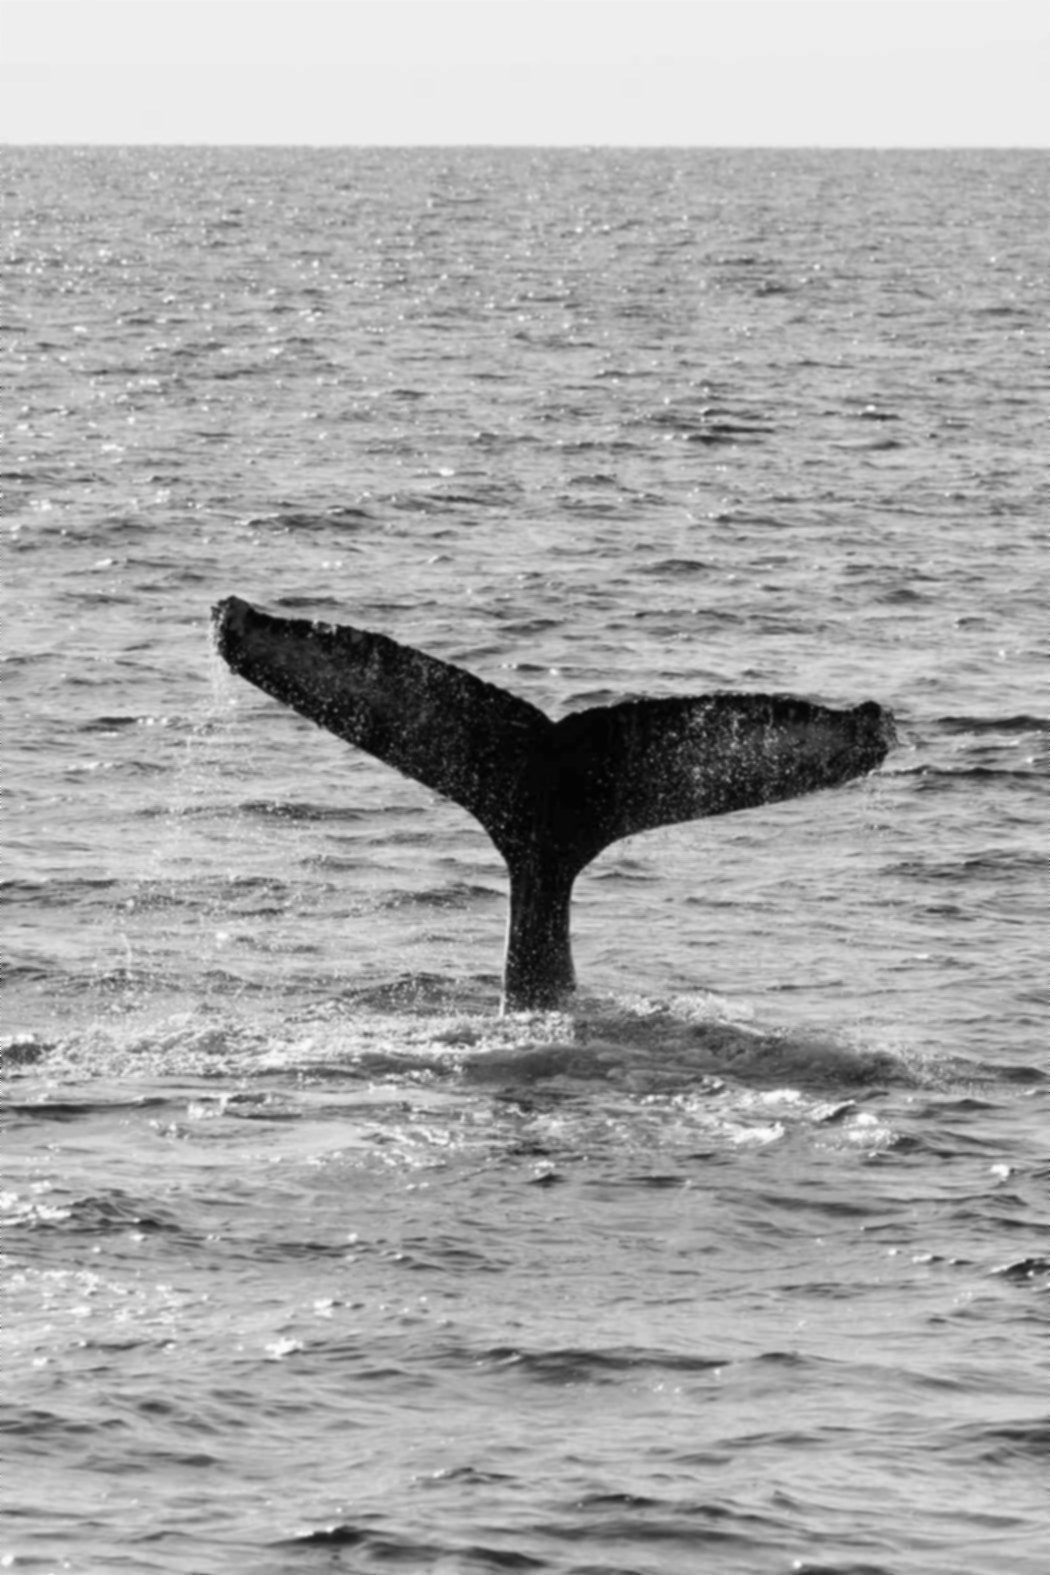

In [16]:
Image.fromarray(smoothed)

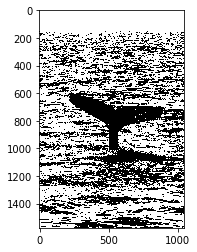

In [17]:
plt.imshow(binary_mean_threshold(smoothed), cmap='gray')

## Thresholding By Hand

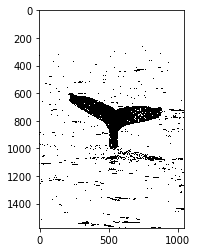

In [18]:
plt.imshow(np.array(im) > 90, cmap='gray')